In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-history-of-baseball/home_game.csv
/kaggle/input/the-history-of-baseball/team.csv
/kaggle/input/the-history-of-baseball/team_franchise.csv
/kaggle/input/the-history-of-baseball/hashes.txt
/kaggle/input/the-history-of-baseball/team_half.csv
/kaggle/input/the-history-of-baseball/pitching_postseason.csv
/kaggle/input/the-history-of-baseball/manager_award.csv
/kaggle/input/the-history-of-baseball/fielding.csv
/kaggle/input/the-history-of-baseball/player_award_vote.csv
/kaggle/input/the-history-of-baseball/appearances.csv
/kaggle/input/the-history-of-baseball/manager.csv
/kaggle/input/the-history-of-baseball/database.sqlite
/kaggle/input/the-history-of-baseball/manager_half.csv
/kaggle/input/the-history-of-baseball/batting.csv
/kaggle/input/the-history-of-baseball/readme.txt
/kaggle/input/the-history-of-baseball/fielding_outfield.csv
/kaggle/input/the-history-of-baseball/college.csv
/kaggle/input/the-history-of-baseball/postseason.csv
/kaggle/input/the-history-of-baseball/p

In [17]:
hitters=pd.read_csv('/kaggle/input/hof-data/hitters2.csv').drop(columns='Unnamed: 0')
hitters

,player_id,stint,g,ab,r,h,double,triple,hr,rbi,...,hbp,sh,sf,g_idp,inducted,percent,threshold,votedBy,year,years
0,henderi01,33.0,3081.0,10961.0,2295.0,3055.0,510.0,66.0,297.0,1115.0,...,98.0,30.0,67.0,172.0,Y,0.948052,0.751391,BBWAA,2009.0,1.0
1,baineha01,32.0,2830.0,9908.0,1299.0,2866.0,488.0,49.0,384.0,1628.0,...,14.0,9.0,99.0,298.0,N,0.061224,0.751391,BBWAA,2011.0,5.0
2,ansonca01,27.0,2523.0,10277.0,1996.0,3418.0,581.0,142.0,97.0,2076.0,...,32.0,27.0,0.0,0.0,Y,NaN,NaN,Old Timers,1939.0,2.0
3,dempsri01,26.0,1766.0,4692.0,525.0,1093.0,223.0,12.0,96.0,471.0,...,18.0,63.0,42.0,131.0,N,0.002114,0.750529,BBWAA,1998.0,1.0
4,bucknbi01,28.0,2517.0,9397.0,1077.0,2715.0,498.0,49.0,174.0,1208.0,...,42.0,47.0,97.0,247.0,N,0.021277,0.751064,BBWAA,1996.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,camparo01,10.0,1215.0,4205.0,627.0,1161.0,178.0,18.0,242.0,856.0,...,30.0,30.0,18.0,143.0,Y,0.794118,0.750000,BBWAA,1969.0,7.0
736,remyje01,10.0,1154.0,4455.0,605.0,1226.0,140.0,38.0,7.0,329.0,...,4.0,116.0,32.0,83.0,N,0.002252,0.750000,BBWAA,1990.0,1.0
737,robinja02,10.0,1382.0,4877.0,947.0,1518.0,273.0,54.0,137.0,734.0,...,72.0,104.0,9.0,113.0,Y,0.775000,0.750000,BBWAA,1962.0,1.0
738,torboje01,10.0,574.0,1391.0,78.0,297.0,42.0,3.0,8.0,101.0,...,4.0,17.0,10.0,36.0,N,0.000000,0.750000,BBWAA,1979.0,1.0


In [18]:
names=pd.read_csv('/kaggle/input/the-history-of-baseball/player.csv')
names['name']=names['name_first']+' '+names['name_last']
names=names[['player_id','name']]
names=names[names['player_id'].isin(hitters['player_id'].tolist())]
hitters=hitters.join(names.set_index(['player_id']), on='player_id')
hitters

,player_id,stint,g,ab,r,h,double,triple,hr,rbi,...,sh,sf,g_idp,inducted,percent,threshold,votedBy,year,years,name
0,henderi01,33.0,3081.0,10961.0,2295.0,3055.0,510.0,66.0,297.0,1115.0,...,30.0,67.0,172.0,Y,0.948052,0.751391,BBWAA,2009.0,1.0,Rickey Henderson
1,baineha01,32.0,2830.0,9908.0,1299.0,2866.0,488.0,49.0,384.0,1628.0,...,9.0,99.0,298.0,N,0.061224,0.751391,BBWAA,2011.0,5.0,Harold Baines
2,ansonca01,27.0,2523.0,10277.0,1996.0,3418.0,581.0,142.0,97.0,2076.0,...,27.0,0.0,0.0,Y,NaN,NaN,Old Timers,1939.0,2.0,Cap Anson
3,dempsri01,26.0,1766.0,4692.0,525.0,1093.0,223.0,12.0,96.0,471.0,...,63.0,42.0,131.0,N,0.002114,0.750529,BBWAA,1998.0,1.0,Rick Dempsey
4,bucknbi01,28.0,2517.0,9397.0,1077.0,2715.0,498.0,49.0,174.0,1208.0,...,47.0,97.0,247.0,N,0.021277,0.751064,BBWAA,1996.0,1.0,Bill Buckner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,camparo01,10.0,1215.0,4205.0,627.0,1161.0,178.0,18.0,242.0,856.0,...,30.0,18.0,143.0,Y,0.794118,0.750000,BBWAA,1969.0,7.0,Roy Campanella
736,remyje01,10.0,1154.0,4455.0,605.0,1226.0,140.0,38.0,7.0,329.0,...,116.0,32.0,83.0,N,0.002252,0.750000,BBWAA,1990.0,1.0,Jerry Remy
737,robinja02,10.0,1382.0,4877.0,947.0,1518.0,273.0,54.0,137.0,734.0,...,104.0,9.0,113.0,Y,0.775000,0.750000,BBWAA,1962.0,1.0,Jackie Robinson
738,torboje01,10.0,574.0,1391.0,78.0,297.0,42.0,3.0,8.0,101.0,...,17.0,10.0,36.0,N,0.000000,0.750000,BBWAA,1979.0,1.0,Jeff Torborg


Just realized that there is no average column...let's add this in there.

In [19]:
hitters['avg']=hitters['h']/hitters['ab']
hitters

,player_id,stint,g,ab,r,h,double,triple,hr,rbi,...,sf,g_idp,inducted,percent,threshold,votedBy,year,years,name,avg
0,henderi01,33.0,3081.0,10961.0,2295.0,3055.0,510.0,66.0,297.0,1115.0,...,67.0,172.0,Y,0.948052,0.751391,BBWAA,2009.0,1.0,Rickey Henderson,0.278715
1,baineha01,32.0,2830.0,9908.0,1299.0,2866.0,488.0,49.0,384.0,1628.0,...,99.0,298.0,N,0.061224,0.751391,BBWAA,2011.0,5.0,Harold Baines,0.289261
2,ansonca01,27.0,2523.0,10277.0,1996.0,3418.0,581.0,142.0,97.0,2076.0,...,0.0,0.0,Y,NaN,NaN,Old Timers,1939.0,2.0,Cap Anson,0.332587
3,dempsri01,26.0,1766.0,4692.0,525.0,1093.0,223.0,12.0,96.0,471.0,...,42.0,131.0,N,0.002114,0.750529,BBWAA,1998.0,1.0,Rick Dempsey,0.232950
4,bucknbi01,28.0,2517.0,9397.0,1077.0,2715.0,498.0,49.0,174.0,1208.0,...,97.0,247.0,N,0.021277,0.751064,BBWAA,1996.0,1.0,Bill Buckner,0.288922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,camparo01,10.0,1215.0,4205.0,627.0,1161.0,178.0,18.0,242.0,856.0,...,18.0,143.0,Y,0.794118,0.750000,BBWAA,1969.0,7.0,Roy Campanella,0.276100
736,remyje01,10.0,1154.0,4455.0,605.0,1226.0,140.0,38.0,7.0,329.0,...,32.0,83.0,N,0.002252,0.750000,BBWAA,1990.0,1.0,Jerry Remy,0.275196
737,robinja02,10.0,1382.0,4877.0,947.0,1518.0,273.0,54.0,137.0,734.0,...,9.0,113.0,Y,0.775000,0.750000,BBWAA,1962.0,1.0,Jackie Robinson,0.311257
738,torboje01,10.0,574.0,1391.0,78.0,297.0,42.0,3.0,8.0,101.0,...,10.0,36.0,N,0.000000,0.750000,BBWAA,1979.0,1.0,Jeff Torborg,0.213515


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

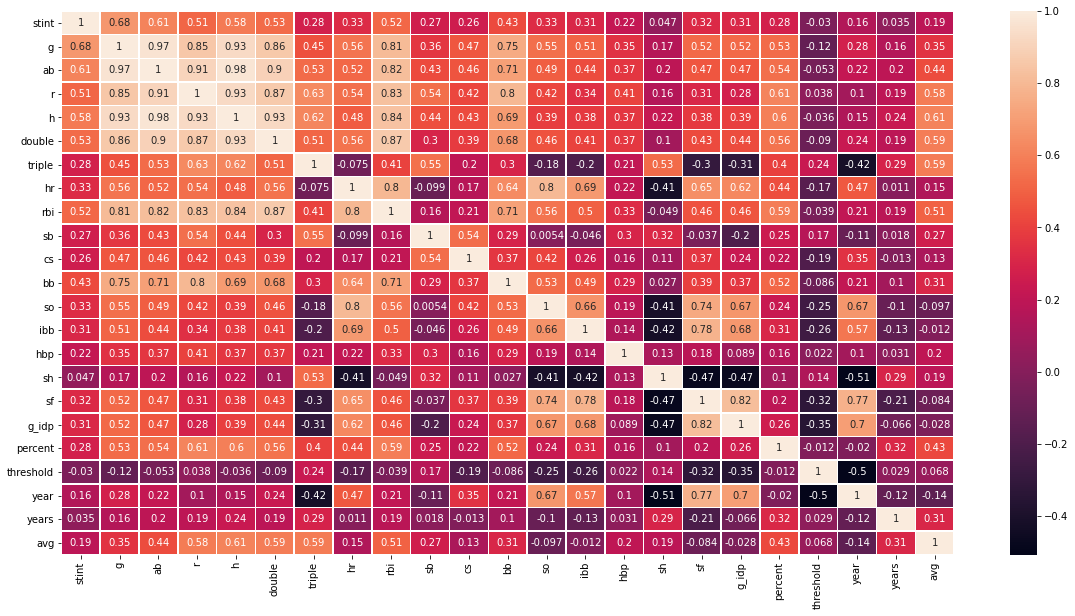

In [21]:
plt.figure(figsize=(20,10))
sns.heatmap(hitters.corr(),annot=True,linewidth=0.5)

Now let's make some important changes. This could be considered data normalization or filtering the data as we want to get rid of outliers. There are outside factors that we need to adjust for so that these outliers do no throw of our model. Pete Rose is the all time leader in hits by far, which on paper makes him a lock for the hall of fame, but the scandals of him gambling on games he coached/played in are the reason he's not in. A number of other players are not in clearly due to cheating scandals (Barry Bonds, Sammy Sosa, etc.). 

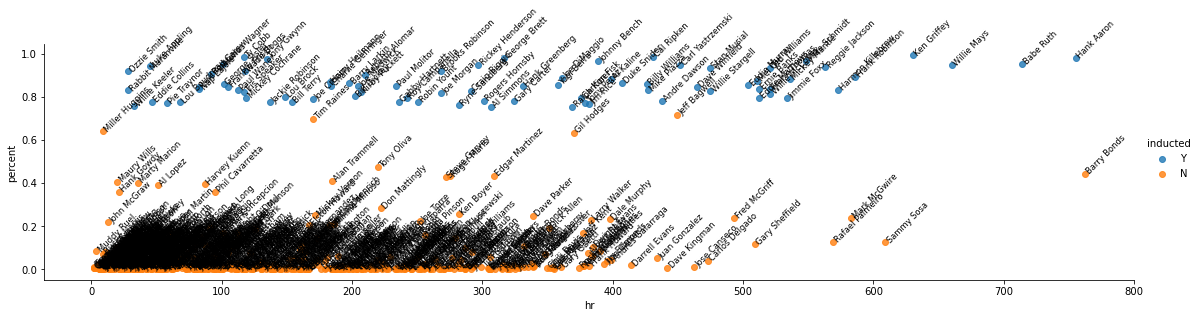

In [22]:
p1=sns.lmplot(x='hr', y="percent", data=hitters,hue='inducted',fit_reg=False,height=4,aspect=4)
ax = p1.axes[0,0]
for i in range(len(hitters)):
    ax.text(hitters['hr'][i], hitters['percent'][i], hitters['name'][i],
           fontsize='small',rotation=45)

Can see some pretty clear outliers.

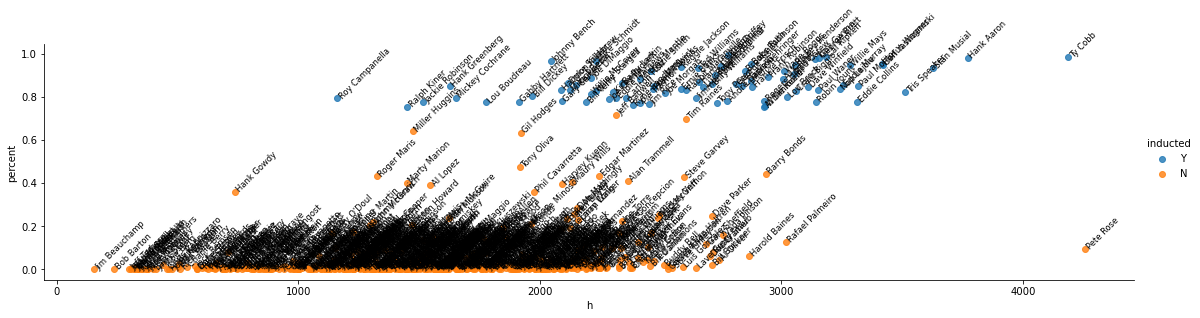

In [23]:
p1=sns.lmplot(x='h', y="percent", data=hitters,hue='inducted',fit_reg=False,height=4,aspect=4)
ax = p1.axes[0,0]
for i in range(len(hitters)):
    ax.text(hitters['h'][i], hitters['percent'][i], hitters['name'][i],
           fontsize='small',rotation=45)

Pete Rose clearly an outlier.

Barry Bonds (bondsba01), Mark McGwire (mcgwima01), Gary Sheffield (sheffga01), Rafael Palmeiro (palmera01), Sammy Sosa(sosasa01), Pete Rose (rosepe01)

In [24]:
outliers=['bondsba01','mcgwima01','sheffga01','palmera01','sosasa01','rosepe01']

In [25]:
hitters_filtered=hitters[-hitters['player_id'].isin(outliers)].reset_index().drop(columns='index')
hitters_filtered

,player_id,stint,g,ab,r,h,double,triple,hr,rbi,...,sf,g_idp,inducted,percent,threshold,votedBy,year,years,name,avg
0,henderi01,33.0,3081.0,10961.0,2295.0,3055.0,510.0,66.0,297.0,1115.0,...,67.0,172.0,Y,0.948052,0.751391,BBWAA,2009.0,1.0,Rickey Henderson,0.278715
1,baineha01,32.0,2830.0,9908.0,1299.0,2866.0,488.0,49.0,384.0,1628.0,...,99.0,298.0,N,0.061224,0.751391,BBWAA,2011.0,5.0,Harold Baines,0.289261
2,ansonca01,27.0,2523.0,10277.0,1996.0,3418.0,581.0,142.0,97.0,2076.0,...,0.0,0.0,Y,NaN,NaN,Old Timers,1939.0,2.0,Cap Anson,0.332587
3,dempsri01,26.0,1766.0,4692.0,525.0,1093.0,223.0,12.0,96.0,471.0,...,42.0,131.0,N,0.002114,0.750529,BBWAA,1998.0,1.0,Rick Dempsey,0.232950
4,bucknbi01,28.0,2517.0,9397.0,1077.0,2715.0,498.0,49.0,174.0,1208.0,...,97.0,247.0,N,0.021277,0.751064,BBWAA,1996.0,1.0,Bill Buckner,0.288922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,camparo01,10.0,1215.0,4205.0,627.0,1161.0,178.0,18.0,242.0,856.0,...,18.0,143.0,Y,0.794118,0.750000,BBWAA,1969.0,7.0,Roy Campanella,0.276100
730,remyje01,10.0,1154.0,4455.0,605.0,1226.0,140.0,38.0,7.0,329.0,...,32.0,83.0,N,0.002252,0.750000,BBWAA,1990.0,1.0,Jerry Remy,0.275196
731,robinja02,10.0,1382.0,4877.0,947.0,1518.0,273.0,54.0,137.0,734.0,...,9.0,113.0,Y,0.775000,0.750000,BBWAA,1962.0,1.0,Jackie Robinson,0.311257
732,torboje01,10.0,574.0,1391.0,78.0,297.0,42.0,3.0,8.0,101.0,...,10.0,36.0,N,0.000000,0.750000,BBWAA,1979.0,1.0,Jeff Torborg,0.213515


Now the data looks much cleaner

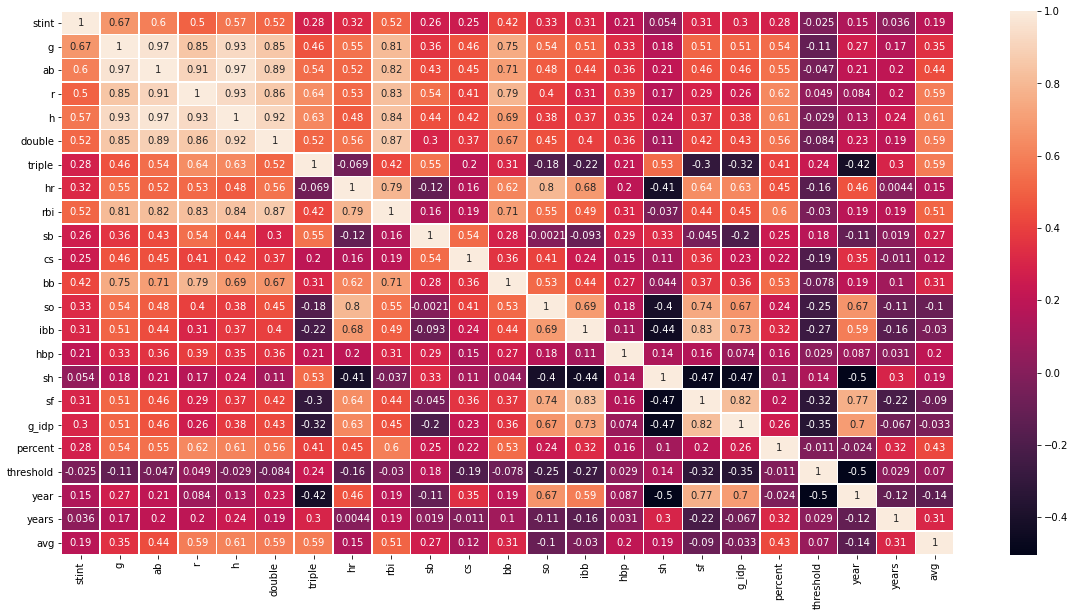

In [26]:
plt.figure(figsize=(20,10))
sns.heatmap(hitters_filtered.corr(),annot=True,linewidth=0.5)

In [27]:
df=pd.DataFrame(hitters_filtered.corr()['percent']).reset_index()
df['Beat Threshold']=abs(df['percent'])>0.45

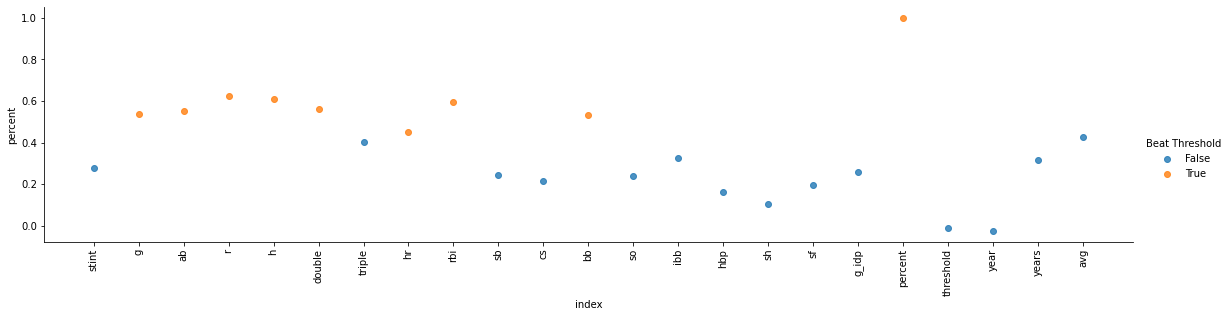

In [28]:
sns.lmplot(x='index', y="percent", data=df,hue='Beat Threshold',fit_reg=False,height=4,
           aspect=4).set_xticklabels(rotation=90)

Factors are g, ab, r, h, hr, rbi, and bb.

In [29]:
def scatter(attribute):
    p1=sns.lmplot(x=attribute, y="percent", data=hitters,hue='inducted',fit_reg=False,height=4,aspect=4)
    ax = p1.axes[0,0]
    for i in range(len(hitters)):
        ax.text(hitters[attribute][i], hitters['percent'][i], hitters['name'][i],
               fontsize='small',rotation=45)

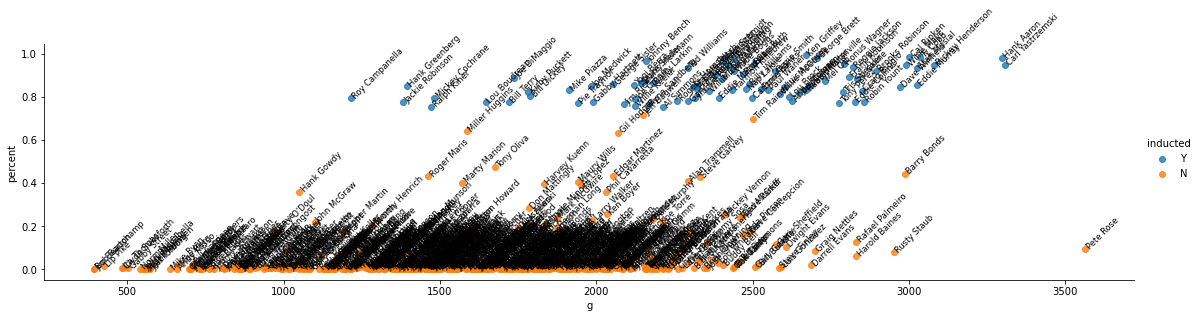

In [30]:
scatter('g')

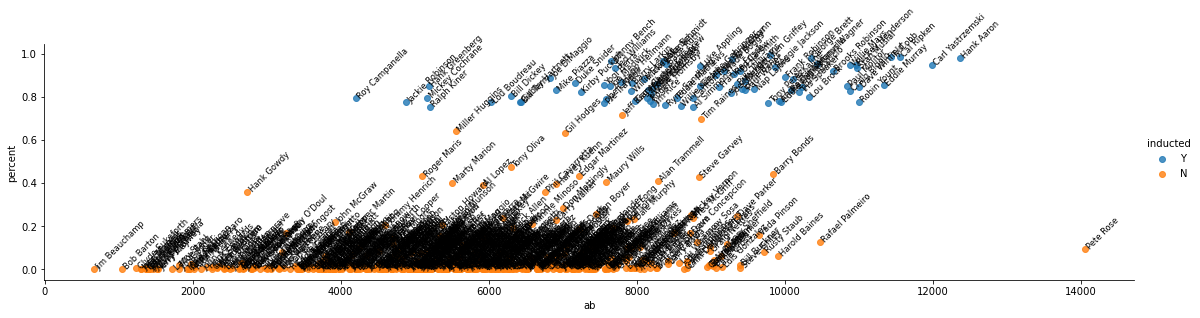

In [31]:
scatter('ab')

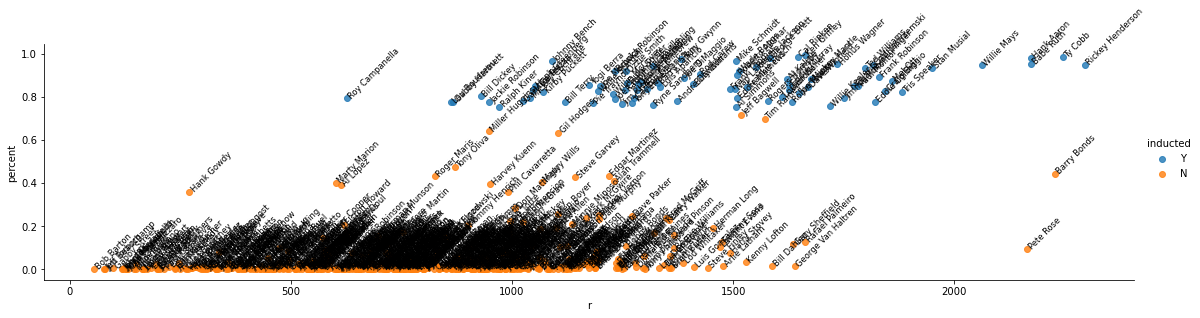

In [32]:
scatter('r')

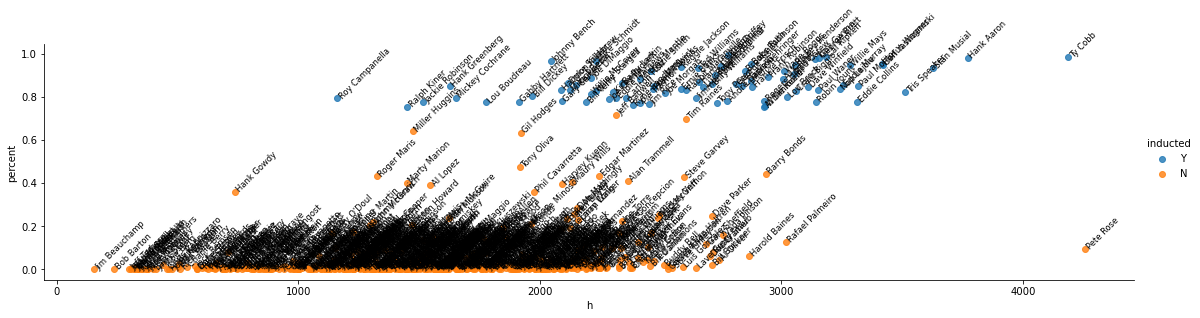

In [33]:
scatter('h')

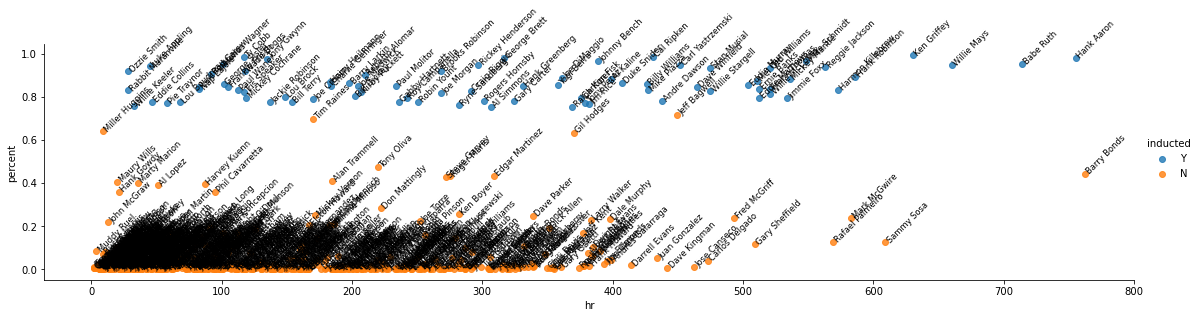

In [34]:
scatter('hr')

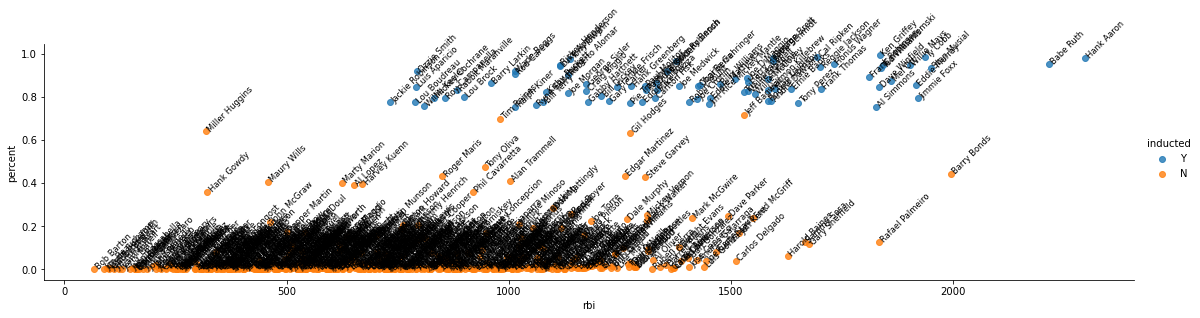

In [35]:
scatter('rbi')

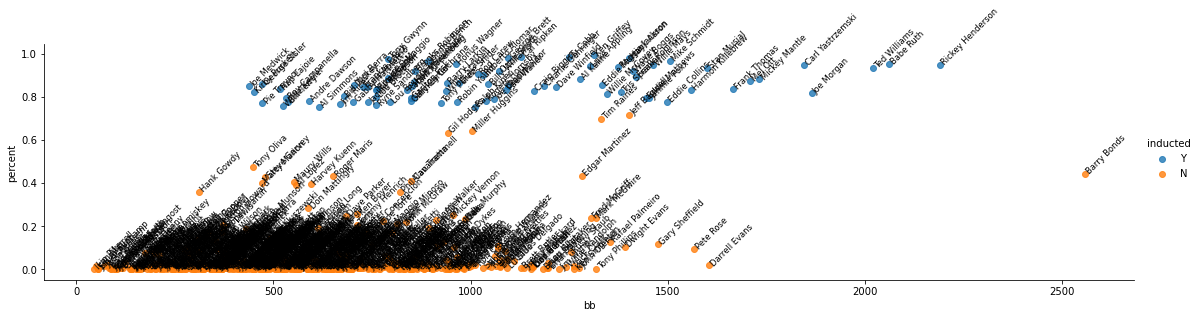

In [36]:
scatter('bb')

In [37]:
hitters_filtered.to_csv('hitters_filtered')